In [29]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

First load the fasta file and then remove the first line as it only includes file meta data.

In [2]:
txt = Path('NC_002549.1.fa').read_text()
first_line = txt.index('\n')
txt = txt[first_line: -1]
txt = txt.replace('\n', '')

Seperate the sequence into coding and non-coding regions

In [3]:
coding = [txt[469:2689],txt[3128:4151],txt[4478:5459],txt[6038:7133],
          txt[8508:9375],txt[10344:11100],txt[11580:18219]]
# the fourth cds is listed in ncbi as join(6039..6923,6923..8068) .
# does this mean there are actually two coding regions joined into one?
# also (6039..6922,6924..6933) 
# check with ask paul
# have to concatenate joined regions into on array to make them divisible by 3
coding.append(txt[6038:6923]+txt[6922:8068])
coding.append(txt[6038:6922]+txt[6923:6933])

In [4]:
non_coding = [txt[0:468], txt[2689:3127], txt[4151:4477],txt[5459:6037],
              txt[8068:8507],txt[9375:10343],txt[11101:11580],txt[18220:-1]]

In [5]:
def get_distribution_sliding(seq, k_mer_dict = {}):
    length = len(seq)-1
    window_open = 0
    window_close = 3
    while(window_close<=length):
        k_mer = seq[window_open:window_close]
        if k_mer in k_mer_dict.keys():
            k_mer_dict[k_mer] += 1
        else:
            k_mer_dict[k_mer] = 1
        window_open += 1
        window_close +=1
    return k_mer_dict

In [6]:
def get_distribution_jumping(seq, k_mer_dict = {}):
    length = len(seq)-1
    window_open = 0
    window_close = 3
    while(window_close<=length):
        k_mer = seq[window_open:window_close]
        if k_mer in k_mer_dict.keys():
            k_mer_dict[k_mer] += 1
        else:
            k_mer_dict[k_mer] = 1
        window_open += 3
        window_close +=3
    return k_mer_dict

Plot distribution of jumping and sliding window for entire sequence

In [7]:
total_cd = get_distribution_jumping(txt)
total_cd_sorted = sorted(total_cd.items(), key=lambda kv: kv[1], reverse=False)

# Total Sequence (Jumping window)

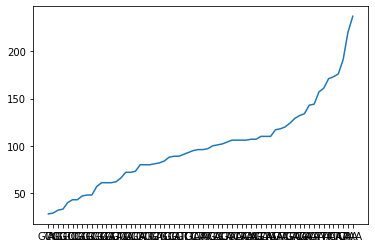

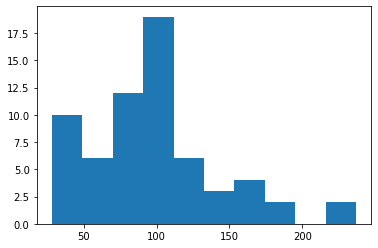

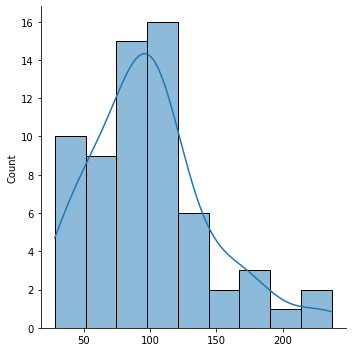

In [35]:
x_total_cd, y_total_cd = zip(*total_cd_sorted)
plt.plot(x_total_cd, y_total_cd)
plt.show()
plt.hist(y_total_cd)
plt.show()
sns.displot(data=total_cd, kde=True)

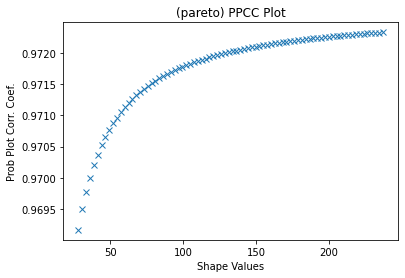

In [9]:
(svals, ppcc) = stats.ppcc_plot(x=y_total_cd, a=y_total_cd[0],
                                b=y_total_cd[-1],plot=plt,
                                dist="pareto")
plt.show()
total_jmp_avg_cc = ppcc.mean()

In [10]:
total_cd_slide = get_distribution_sliding(txt)
total_cd_slide_sorted = sorted(total_cd_slide.items(),
                               key=lambda kv: kv[1], 
                               reverse=False)

# Total Sequence (Sliding Window)

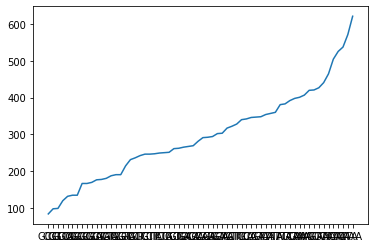

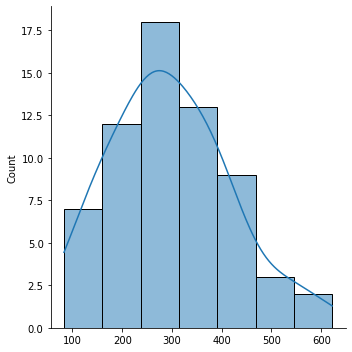

In [36]:
x_total_cd_slide, y_total_cd_slide = zip(*total_cd_slide_sorted)
plt.plot(x_total_cd_slide, y_total_cd_slide)
plt.show()
sns.displot(data=total_cd_slide, kde=True)

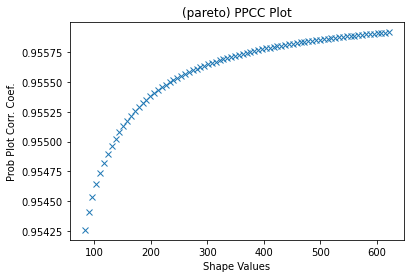

In [12]:
(svals, ppcc) = stats.ppcc_plot(x=y_total_cd_slide, a=y_total_cd_slide[0],
                                b=y_total_cd_slide[-1], plot=plt, 
                                dist="pareto")
plt.show()
total_sld_avg_cc = ppcc.mean()

In [13]:
coding_cd = {}
for seq in coding:
    coding_cd = get_distribution_jumping(seq, coding_cd)

# Coding Sequences (Jumping)

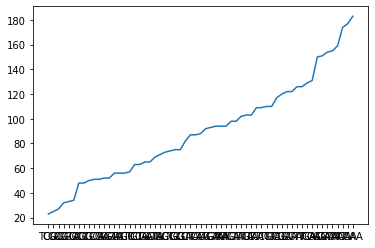

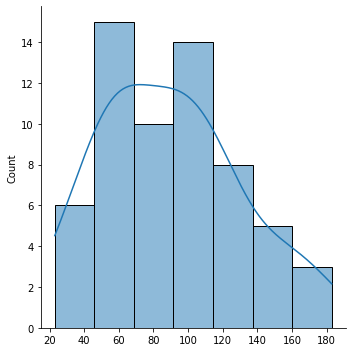

In [37]:
coding_cd_sorted = sorted(coding_cd.items(), key=lambda kv:kv[1], reverse = False)
x_coding_cd, y_coding_cd = zip(*coding_cd_sorted)
plt.plot(x_coding_cd, y_coding_cd)
plt.show()
sns.displot(data=coding_cd, kde=True)

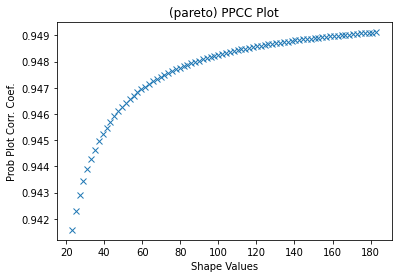

In [15]:
(svals, ppcc) = stats.ppcc_plot(x=y_coding_cd, a=y_coding_cd[0],
                                b=y_coding_cd[-1], plot=plt, 
                                dist="pareto")
plt.show()
coding_jmp_avg_cc = ppcc.mean()

In [16]:
coding_cd_sliding = {}
for seq in coding:
    coding_cd_sliding = get_distribution_sliding(seq, coding_cd_sliding)

# Coding Sequences (Sliding)

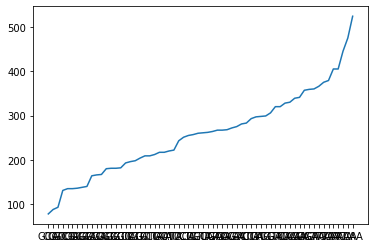

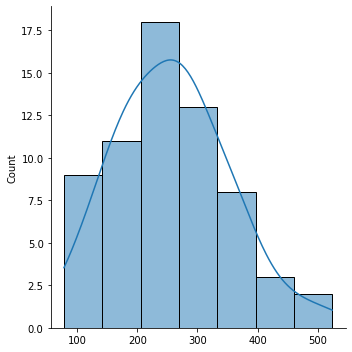

In [38]:
coding_cd_sliding_sorted = sorted(coding_cd_sliding.items(),
                                  key=lambda kv:kv[1],
                                  reverse = False)
x_coding_cd_sliding, y_coding_cd_sliding = zip(*coding_cd_sliding_sorted)
plt.plot(x_coding_cd_sliding, y_coding_cd_sliding)
plt.show()
sns.displot(data=coding_cd_sliding, kde=True)

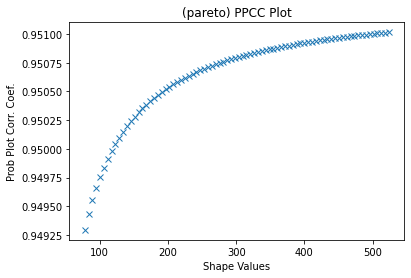

In [18]:
(svals, ppcc) = stats.ppcc_plot(x=y_coding_cd_sliding, a=y_coding_cd_sliding[0],
                                b=y_coding_cd_sliding[-1], plot=plt, 
                                dist="pareto")
plt.show()
coding_sld_avg_cc = ppcc.mean()

In [19]:
non_coding_cd = {}
for seq in non_coding:
    non_coding_cd = get_distribution_jumping(seq, non_coding_cd)

# Non Coding Sequences (Jumping)

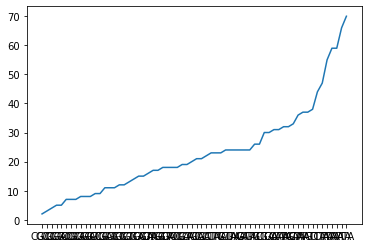

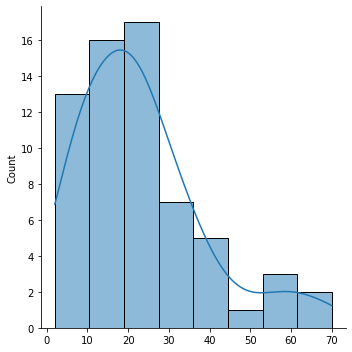

In [39]:
non_coding_cd_sorted = sorted(non_coding_cd.items(), key=lambda kv:kv[1], reverse = False)
x_non_coding_cd, y_non_coding_cd = zip(*non_coding_cd_sorted)
plt.plot(x_non_coding_cd, y_non_coding_cd)
plt.show()
sns.displot(data=non_coding_cd, kde=True)

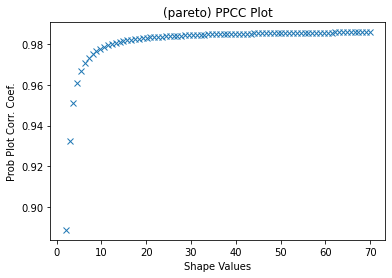

In [21]:
(svals, ppcc) = stats.ppcc_plot(x=y_non_coding_cd, a=y_non_coding_cd[0],
                                b=y_non_coding_cd[-1], plot=plt, 
                                dist="pareto")
plt.show()
noncoding_jmp_avg_cc = ppcc.mean()

In [22]:
non_coding_cd_sliding = {}
for seq in non_coding:
    non_coding_cd_sliding = get_distribution_sliding(seq, non_coding_cd_sliding)

# Non Coding Sequences (Sliding)

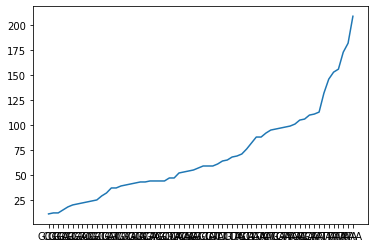

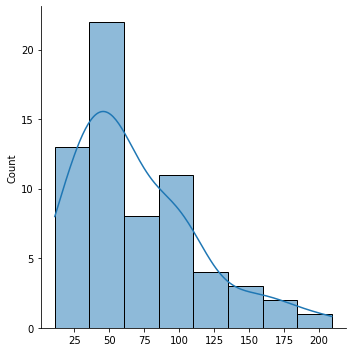

In [40]:
non_coding_cd_sliding_sorted = sorted(non_coding_cd_sliding.items(), key=lambda kv:kv[1], reverse = False)
x_non_coding_cd_sliding, y_non_coding_cd_sliding = zip(*non_coding_cd_sliding_sorted)
plt.plot(x_non_coding_cd_sliding, y_non_coding_cd_sliding)
plt.show()
sns.displot(data=non_coding_cd_sliding, kde=True)

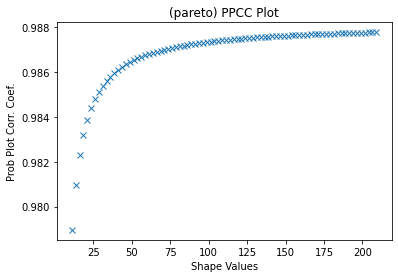

In [24]:
(svals, ppcc) = stats.ppcc_plot(x=y_non_coding_cd_sliding, a=y_non_coding_cd_sliding[0],
                                b=y_non_coding_cd_sliding[-1], plot=plt, 
                                dist="pareto")
plt.show()
noncoding_sld_avg_cc = ppcc.mean()

# Average Correlation Coefficients

In [25]:
print("Average Correlation Coeffcients(Pareto Distribution):")
print("Window\tSliding\t\t\tJumping")
print("Total\t{}\t{}".format(total_sld_avg_cc,total_jmp_avg_cc))
print("CDS\t{}\t{}".format(coding_sld_avg_cc, coding_jmp_avg_cc))
print("Non-CDS\t{}\t{}".format(noncoding_sld_avg_cc, noncoding_jmp_avg_cc))

Average Correlation Coeffcients(Pareto Distribution):
Window	Sliding			Jumping
Total	0.9555751100289891	0.9717412934402112
CDS	0.9506391857811263	0.9476424400891371
Non-CDS	0.9868386714216071	0.9809568453221438


Non coding regions seem to be closer to the pareto distribution but it is within a margin of error. Must verify somehow. Is it possible to download (in bulk) coding regions for different organisms? Please research.

I know this looks insane, but, I tried the same operation with a different distribution and didn't get even close to this corellation. SPOOKY